# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">یکنواخت سازی(متعادل سازی) هیستوگرام</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">
تصویری را در نظر بگیرید که مقادیر پیکسل آن فقط به محدوده خاصی از مقادیر محدود می شود. به عنوان مثال، تصویر روشن تر دارای تمام پیکسل ها محدود به مقادیر بالا خواهد بود. اما یک تصویر خوب دارای پیکسل هایی از تمام مناطق تصویر خواهد بود. بنابراین شما باید این هیستوگرام را به هر دو انتها بکشید (همانطور که در تصویر زیر از ویکی پدیا آمده است) و این همان کاری است که یکنواخت سازی هیستوگرام (به عبارت ساده) انجام می دهد. این به طور معمول کنتراست تصویر را بهبود می بخشد.
</div>    

![histogram equalization](lecture_images/histogram_equalization.png "histogram equalization")

[wikipedia page on Histogram Equalization](https://en.wikipedia.org/wiki/Histogram_equalization)

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">   
    فرآیند یکنواخت‌سازی هیستوگرام یک روش پردازش تصویری برای تنظیم کنتراست تصویر با تغییر هیستوگرام تصویر است.
<br />
 از آنجایی که قله های بزرگ در هیستوگرام معمولا به قسمتهای کنتراست کم مطابقت دارد، از این رو یکنواخت‌سازی هیستوگرام منجر به بهبود کنتراست کلی یک تصویر می شود.
<br/>
    این روش هر جایی که تضاد یا کانترست مورد نیا باشد خصوصا مواردی مانند تصاویر پزشکی یا ماهواره ای بسیار مورد استفاده قرار می گیرد.
</div>

```cv2.equalizeHist(image)```

Text(0.5, 1.0, 'equalized histogram')

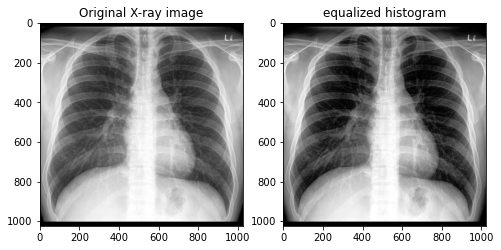

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

#image source: https://radiopaedia.org/cases/normal-frontal-chest-x-ray?lang=us
image = cv2.imread('images/xray.jpg', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[8,4])
plt.subplot(121);plt.imshow(image, cmap='gray');plt.title("Original X-ray image");
plt.subplot(122);plt.imshow(result, cmap='gray');plt.title("equalized histogram")

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">رسم هیستوگرام در کنار تصویر</div>

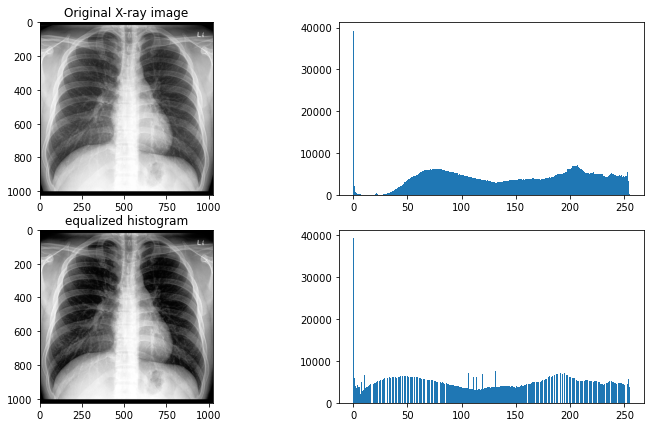

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

#image source: https://radiopaedia.org/cases/normal-frontal-chest-x-ray?lang=us
image = cv2.imread('images/xray.jpg', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(image, cmap='gray');plt.title("Original X-ray image");
plt.subplot(222);plt.hist(image.ravel(), 256);

plt.subplot(223);plt.imshow(result, cmap='gray');plt.title("equalized histogram");
plt.subplot(224);plt.hist(result.ravel(), 256);

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی روی تصویر ماهواره ای</div>

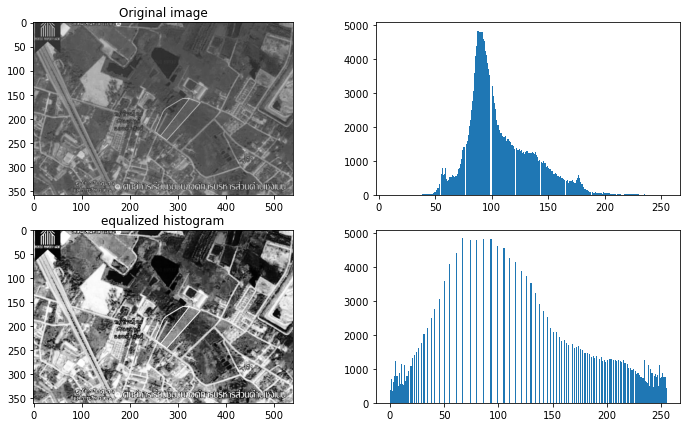

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('images/satellite.jpg', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(image, cmap='gray');plt.title("Original image");
plt.subplot(222);plt.hist(image.ravel(), 256);

plt.subplot(223);plt.imshow(result, cmap='gray');plt.title("equalized histogram");
plt.subplot(224);plt.hist(result.ravel(), 256);

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی روی تصویر دیگر</div>

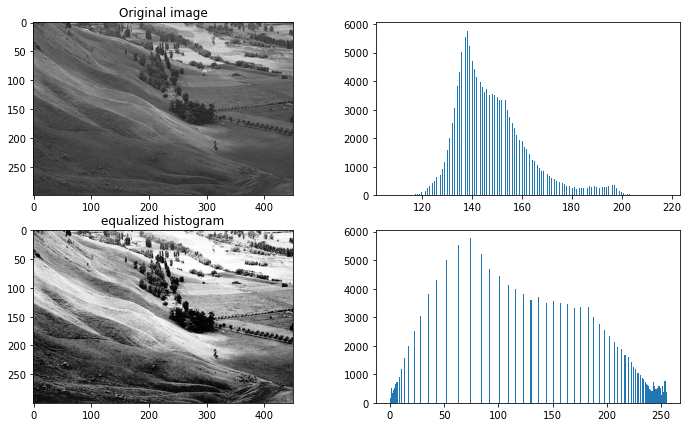

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

#image source: https://en.wikipedia.org/wiki/Histogram_equalization
image = cv2.imread('images/low-contrast.jpg', 0)
result = cv2.equalizeHist(image)

plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(image, cmap='gray');plt.title("Original image");
plt.subplot(222);plt.hist(image.ravel(), 256);

plt.subplot(223);plt.imshow(result, cmap='gray');plt.title("equalized histogram");
plt.subplot(224);plt.hist(result.ravel(), 256);

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">یکنواخت‌سازی هیستوگرام روی تصاویر رنگی</div>

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/mid.png')
###############
# Histogram Equalization
channels = cv2.split(image)
eq_channels = []
for ch in channels:
    eq_channels.append(cv2.equalizeHist(ch))
eq_image = cv2.merge(eq_channels)


#plot images
plt.figure(figsize=[12,7])
plt.subplot(221);plt.imshow(image[...,::-1]);plt.title("Original");
plt.subplot(223);plt.imshow(eq_image[...,::-1]);plt.title("Equalized");


color = ('b', 'g', 'r')
#Original image histogram
plt.subplot(222);
for i, col in enumerate(color):
    histogram = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)
    
#Equualized image histogram
plt.subplot(224);
for i, col in enumerate(color):
    histogram = cv2.calcHist([eq_image], [i], None, [256], [0, 256])
    plt.plot(histogram, color = col)